# Data Collection and Preprocessing


In [1]:
#making a root directory kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
#giving access to the directory
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#downloading the dataset
!kaggle datasets download -d irvifa/amazon-product-reviews

Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews
License(s): unknown
 95% 104M/109M [00:00<00:00, 135MB/s] 
100% 109M/109M [00:00<00:00, 139MB/s]


In [3]:
!unzip amazon-product-reviews.zip

Archive:  amazon-product-reviews.zip
  inflating: ratings_Electronics.csv  


In [4]:
#importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)


In [5]:
df_ecommerce = pd.read_csv('ratings_Electronics.csv', names=['userId', 'productId','rating','timestamp'])
df_ecommerce.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
df_ecommerce.shape

(7824482, 4)

In [7]:
df_ecommerce.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [8]:
#since our dataset is very large we are only taking 20% of dataset
df_electronics = df_ecommerce.sample(n=1564896,ignore_index=True)

In [9]:
df_electronics.shape

(1564896, 4)

In [10]:
#deleting the dataframe df_ecommerce
del df_ecommerce

In [11]:
df_electronics.head()

,userId,productId,rating,timestamp
0,A2LP9S0SMIH7M3,B0011ULQNI,4.0,1209772800
1,AWMBV8N9C1OY3,B00081A2KY,5.0,1348012800
2,A2E20IV2APZYDG,B0002SQ2P2,5.0,1252713600
3,A2240J73FTPR21,B009A6CZYY,2.0,1353628800
4,AEVKDB7IYTPFS,B0013EXTZU,1.0,1353628800


In [12]:
#deleting the column timestamp
df_electronics.drop('timestamp',axis=1,inplace=True)

In [13]:
#getting information about the dataset
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
dtypes: float64(1), object(2)
memory usage: 35.8+ MB


In [14]:
df_electronics.describe()

,rating
count,1.564896e+06
mean,4.012853e+00
std,1.381046e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [15]:
#finding missing values
df_electronics.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [16]:
#handling duplicate coumns
df_electronics.duplicated().sum()

0

In [17]:
df_electronics.head()

,userId,productId,rating
0,A2LP9S0SMIH7M3,B0011ULQNI,4.0
1,AWMBV8N9C1OY3,B00081A2KY,5.0
2,A2E20IV2APZYDG,B0002SQ2P2,5.0
3,A2240J73FTPR21,B009A6CZYY,2.0
4,AEVKDB7IYTPFS,B0013EXTZU,1.0


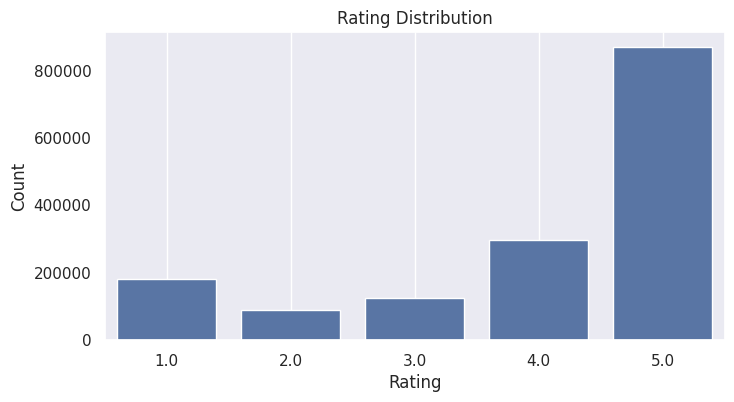

In [18]:
#plotting the rating distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='rating',data=df_electronics)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [19]:
#print total rating, total unique users, total unique products
print(f'Total rating: {df_electronics.rating.sum()}')
print(f'Total unique users: {df_electronics.userId.nunique()}')
print(f'Total unique products: {df_electronics.productId.nunique()}')

Total rating: 6279698.0
Total unique users: 1226062
Total unique products: 237580


In [20]:
#analyzing rating by the user
no_of_rated_product_per_user = df_electronics.groupby('userId')['rating'].sum().sort_values(ascending=False)
no_of_rated_product_per_user.head()

userId
A680RUE1FDO8B     438.0
A3OXHLG6DIBRW8    422.0
A1ODOGXEYECQQ8    419.0
ADLVFFE4VBT8      414.0
A5JLAU2ARJ0BO     410.0
Name: rating, dtype: float64

In [21]:
print('No of rated product more than 50 per user : {}' .format(sum(no_of_rated_product_per_user >= 50)))


No of rated product more than 50 per user : 1359


# Popularity Based Recommendation

In [22]:
#filter the DataFrame df_electronics to include only those products that have at least 50 ratings
df_data = df_electronics.groupby('productId').filter(lambda x:x['rating'].count() >= 50)

In [23]:
df_data.head()

,userId,productId,rating
0,A2LP9S0SMIH7M3,B0011ULQNI,4.0
1,AWMBV8N9C1OY3,B00081A2KY,5.0
2,A2E20IV2APZYDG,B0002SQ2P2,5.0
12,A1N42DSOOA0WMR,B00APCMMDG,5.0
13,A1FRDNWTAYQF7E,B0029U2YSA,1.0


In [24]:
no_of_rated_product_per_user = df_data.groupby('productId')['rating'].sum().sort_values(ascending=False)
no_of_rated_product_per_user.head()

productId
B0074BW614    16505.0
B00DR0PDNE    13219.0
B007WTAJTO    12290.0
B0019EHU8G    11600.0
B006GWO5WK    10551.0
Name: rating, dtype: float64

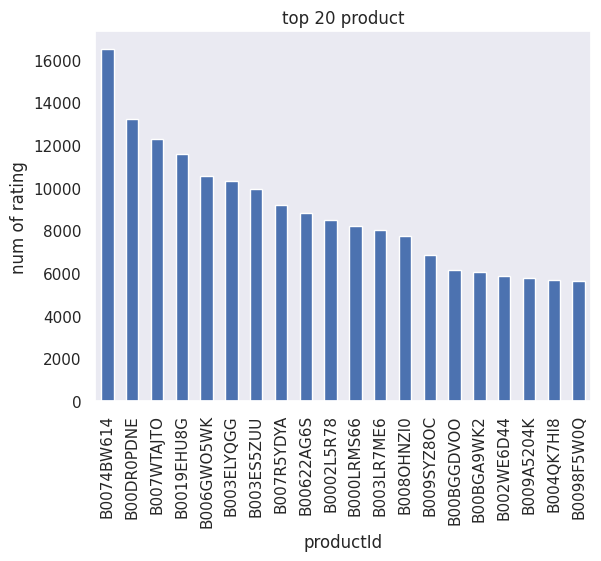

In [25]:
# plotting top 20 product
no_of_rated_product_per_user.head(20).plot(kind = 'bar')
plt.title('top 20 product')
plt.xlabel('productId')
plt.ylabel('num of rating')
plt.grid()
plt.show()



In [26]:
#calculating average rating product
mean_rating_product_count = pd.DataFrame(df_data.groupby('productId')['rating'].mean())
mean_rating_product_count.head()

,rating
productId,
0972683275,4.511737
1400532655,3.697674
140053271X,3.941176
B00000DM9W,4.716418
B00000J1V5,4.538462


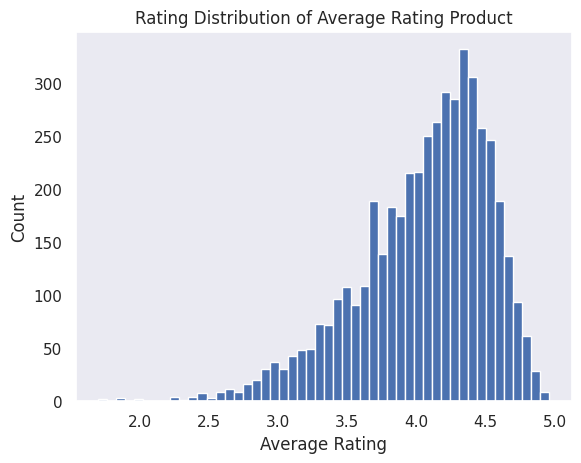

In [27]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=50)
plt.title('Rating Distribution of Average Rating Product')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [28]:
#check the skewness of mean_rating_product_count
mean_rating_product_count['rating'].skew()

-0.9132722179627805

In [29]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(df_data.groupby('productId')['rating'].count())
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.511737,213
1400532655,3.697674,86
140053271X,3.941176,85
B00000DM9W,4.716418,67
B00000J1V5,4.538462,65


In [30]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.503411,3665


In [31]:
#finding the minimum rating and no. of products with minimum rating
print('min average rating product : ',mean_rating_product_count['rating'].min())
print('no. of products with minimum rating : ',mean_rating_product_count[mean_rating_product_count['rating']==mean_rating_product_count['rating'].min()].shape[0])

min average rating product :  1.7
no. of products with minimum rating :  1


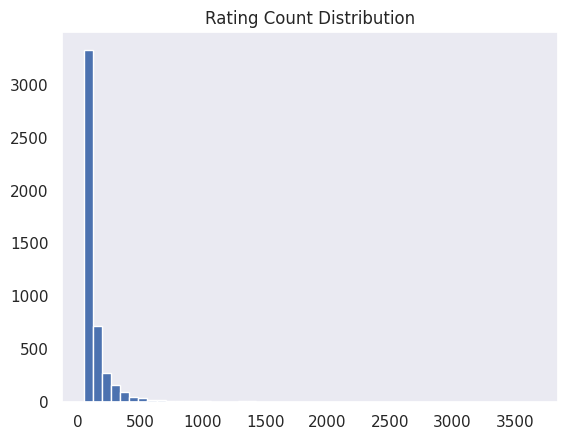

In [32]:
#plot the rating count of mean rating product count
plt.hist(mean_rating_product_count['rating_counts'],bins=50)
plt.title('Rating Count Distribution')
plt.grid()
plt.show()


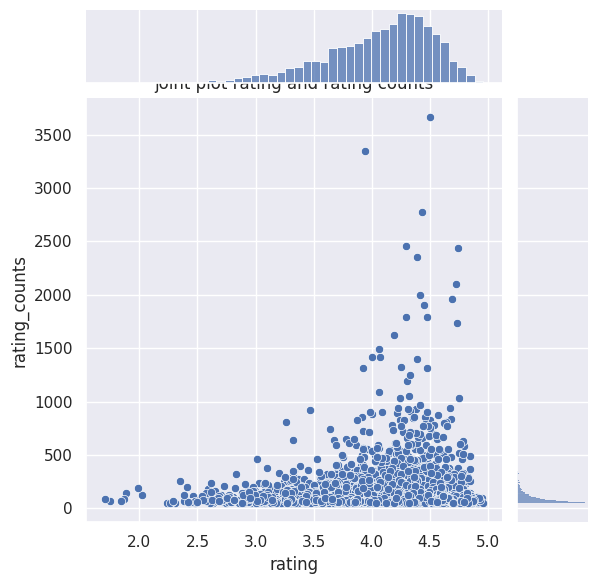

In [33]:
#joint plot of rating and rating count
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('joint plot rating and rating counts')
plt.show()

There is a positive realtionship betweeen rating and rating counts


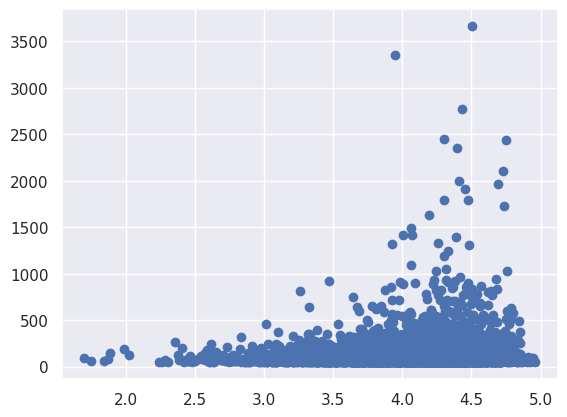

In [34]:
#using scatter plots
plt.scatter(x=mean_rating_product_count['rating'], y=mean_rating_product_count['rating_counts'])
plt.show()

In [35]:
print('Correlation between rating and rating counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between rating and rating counts is : 0.1141985593997076 


# Model based collaborative filtering

In [36]:
#create a pivot table
df_data2 = df_electronics.sample(20000)
ratings_matrix = df_data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501776,140053271X,1400698987,9573212919,9966338926,9983891212,9984978265,9984984354,...,B00K4DTTLY,B00K4VQZCM,B00K73NW4G,B00K760Z84,B00K7TP31A,B00KB998XA,B00KCIL8NS,B00KFO0MO0,B00KLE0E88,B00LDLE6KA
userId,,,,,,,,,,,,,,,,,,,,,
A0284208PB0CNSHI1OC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A033026331PLZDFEFBFSQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0378617OY5YINQO9L4X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A06203032NWC11TAU4345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0764857RX591HHUZ2DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
ratings_matrix.shape

(19877, 14201)

In [46]:
#taking transpose of ratings_matrix where productId as index and userId as columns
x_ratings_matrix = ratings_matrix.T
x_ratings_matrix.head()

userId,A0284208PB0CNSHI1OC6,A033026331PLZDFEFBFSQ,A0378617OY5YINQO9L4X,A06203032NWC11TAU4345,A0764857RX591HHUZ2DG,A0777425OFMFJSCSDDOR,A08250901Y9Z65JJ1J6FW,A0878869USN9WBBIH0GM,A090408565LTAV9SPNN2,A1003931KO265UXSPU90,...,AZXCWRTD9V0Q3,AZXFS8GCTSQ5R,AZXGHOD8JKO4S,AZY0VWQIDRBLE,AZYDUGJSOC4UA,AZYJE40XW6MFG,AZYS62CA5X6YZ,AZYW8AGJ5P6F3,AZZJX02B2F22D,AZZWSDNZTWD4S
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400698987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
x_ratings_matrix.shape

(14201, 19877)

In [48]:
#decomposion of matrix using singular value decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(14201, 10)

In [49]:
#correlation matrixA
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(14201, 14201)

In [50]:
x_ratings_matrix.index[10]

'998498480X'

In [51]:
i = "998498480X"
product_names = list(x_ratings_matrix.index)
product_id = product_names.index(i)
print(product_id)



10


In [52]:
correlation_product_id = correlation_matrix[product_id]
correlation_product_id.shape

(14201,)

In [53]:
correlation_matrix[correlation_product_id>0.85].shape

(230, 14201)

In [54]:
recommend = list(x_ratings_matrix.index[correlation_product_id>0.85])
recommend[:20]

['998498480X',
 'B00000JFE3',
 'B00001P4ZH',
 'B00004LMEC',
 'B00004U0EB',
 'B000068GEM',
 'B000069JWX',
 'B00006I5BW',
 'B00008T1TZ',
 'B00008VF4L',
 'B00009U0XI',
 'B0000A55CO',
 'B0000ZOLMI',
 'B0001G6U7K',
 'B0001ZMGRE',
 'B0002MQGKE',
 'B0002VAQR4',
 'B0002VMSG6',
 'B0002VMVMW',
 'B00061S2OO']